In [1]:
import pickle
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
import ast

In [2]:
D = pd.read_csv("../runs/0316_addition+original.csv", converters={"profile_avgProfile":ast.literal_eval})
D

,s,d,profile_avgProfile
0,0.01,-0.5,"[65.31623931623932, 18.119658119658116, 7.6581..."
1,0.01,-1.0,"[65.21367521367522, 17.15384615384615, 7.53846..."
2,0.01,-1.5,"[64.78632478632478, 17.452991452991455, 7.5811..."
3,0.01,-2.0,"[66.0940170940171, 16.880341880341877, 7.66666..."
4,0.01,-2.5,"[67.00854700854701, 17.57264957264957, 8.04273..."
...,...,...,...
182,0.75,2.0,"[89.80341880341881, 36.5897435897436, 21.55555..."
183,0.75,2.5,"[86.84615384615384, 37.00000000000001, 21.5470..."
184,0.75,3.0,"[85.94017094017093, 36.03418803418803, 21.5726..."
185,0.75,3.5,"[86.4957264957265, 35.82051282051282, 20.67521..."


In [3]:
def cps(profile):
    return sum( [np.log2(x)/(i+1) if x > 1 else 0 for i, x in enumerate(profile)] ) # in paper 10/3/22
    
AD = D.copy()
AD["cps"] = AD["profile_avgProfile"].apply(cps)
AD

,s,d,profile_avgProfile,cps
0,0.01,-0.5,"[65.31623931623932, 18.119658119658116, 7.6581...",10.708778
1,0.01,-1.0,"[65.21367521367522, 17.15384615384615, 7.53846...",10.559358
2,0.01,-1.5,"[64.78632478632478, 17.452991452991455, 7.5811...",10.561774
3,0.01,-2.0,"[66.0940170940171, 16.880341880341877, 7.66666...",10.580309
4,0.01,-2.5,"[67.00854700854701, 17.57264957264957, 8.04273...",10.686376
...,...,...,...,...
182,0.75,2.0,"[89.80341880341881, 36.5897435897436, 21.55555...",13.639711
183,0.75,2.5,"[86.84615384615384, 37.00000000000001, 21.5470...",13.697659
184,0.75,3.0,"[85.94017094017093, 36.03418803418803, 21.5726...",13.689843
185,0.75,3.5,"[86.4957264957265, 35.82051282051282, 20.67521...",13.735384


,s,d,profile_avgProfile,cps,sum
49,0.150,3.5,"[67.05128205128206, 14.350427350427351, 5.5897...",0.683603,187.786325
48,0.150,3.0,"[67.15384615384615, 13.81196581196581, 5.27350...",0.687166,187.649573
50,0.150,4.0,"[67.92307692307692, 14.222222222222221, 5.4786...",0.689048,188.675214
44,0.150,1.0,"[68.03418803418805, 15.068376068376068, 5.7777...",0.692152,189.401709
47,0.150,2.5,"[69.82051282051282, 14.675213675213676, 5.2820...",0.693064,190.837607
...,...,...,...,...,...
143,0.600,-4.0,"[77.27350427350429, 29.11111111111111, 17.2820...",0.996105,200.000000
123,0.525,-2.5,"[77.3931623931624, 28.17094017094017, 16.52136...",0.997319,200.000000
142,0.600,-3.5,"[77.94017094017094, 28.68376068376069, 17.1880...",0.998863,200.000000
126,0.525,-4.0,"[76.47008547008546, 26.47008547008547, 15.2649...",0.998968,200.000000


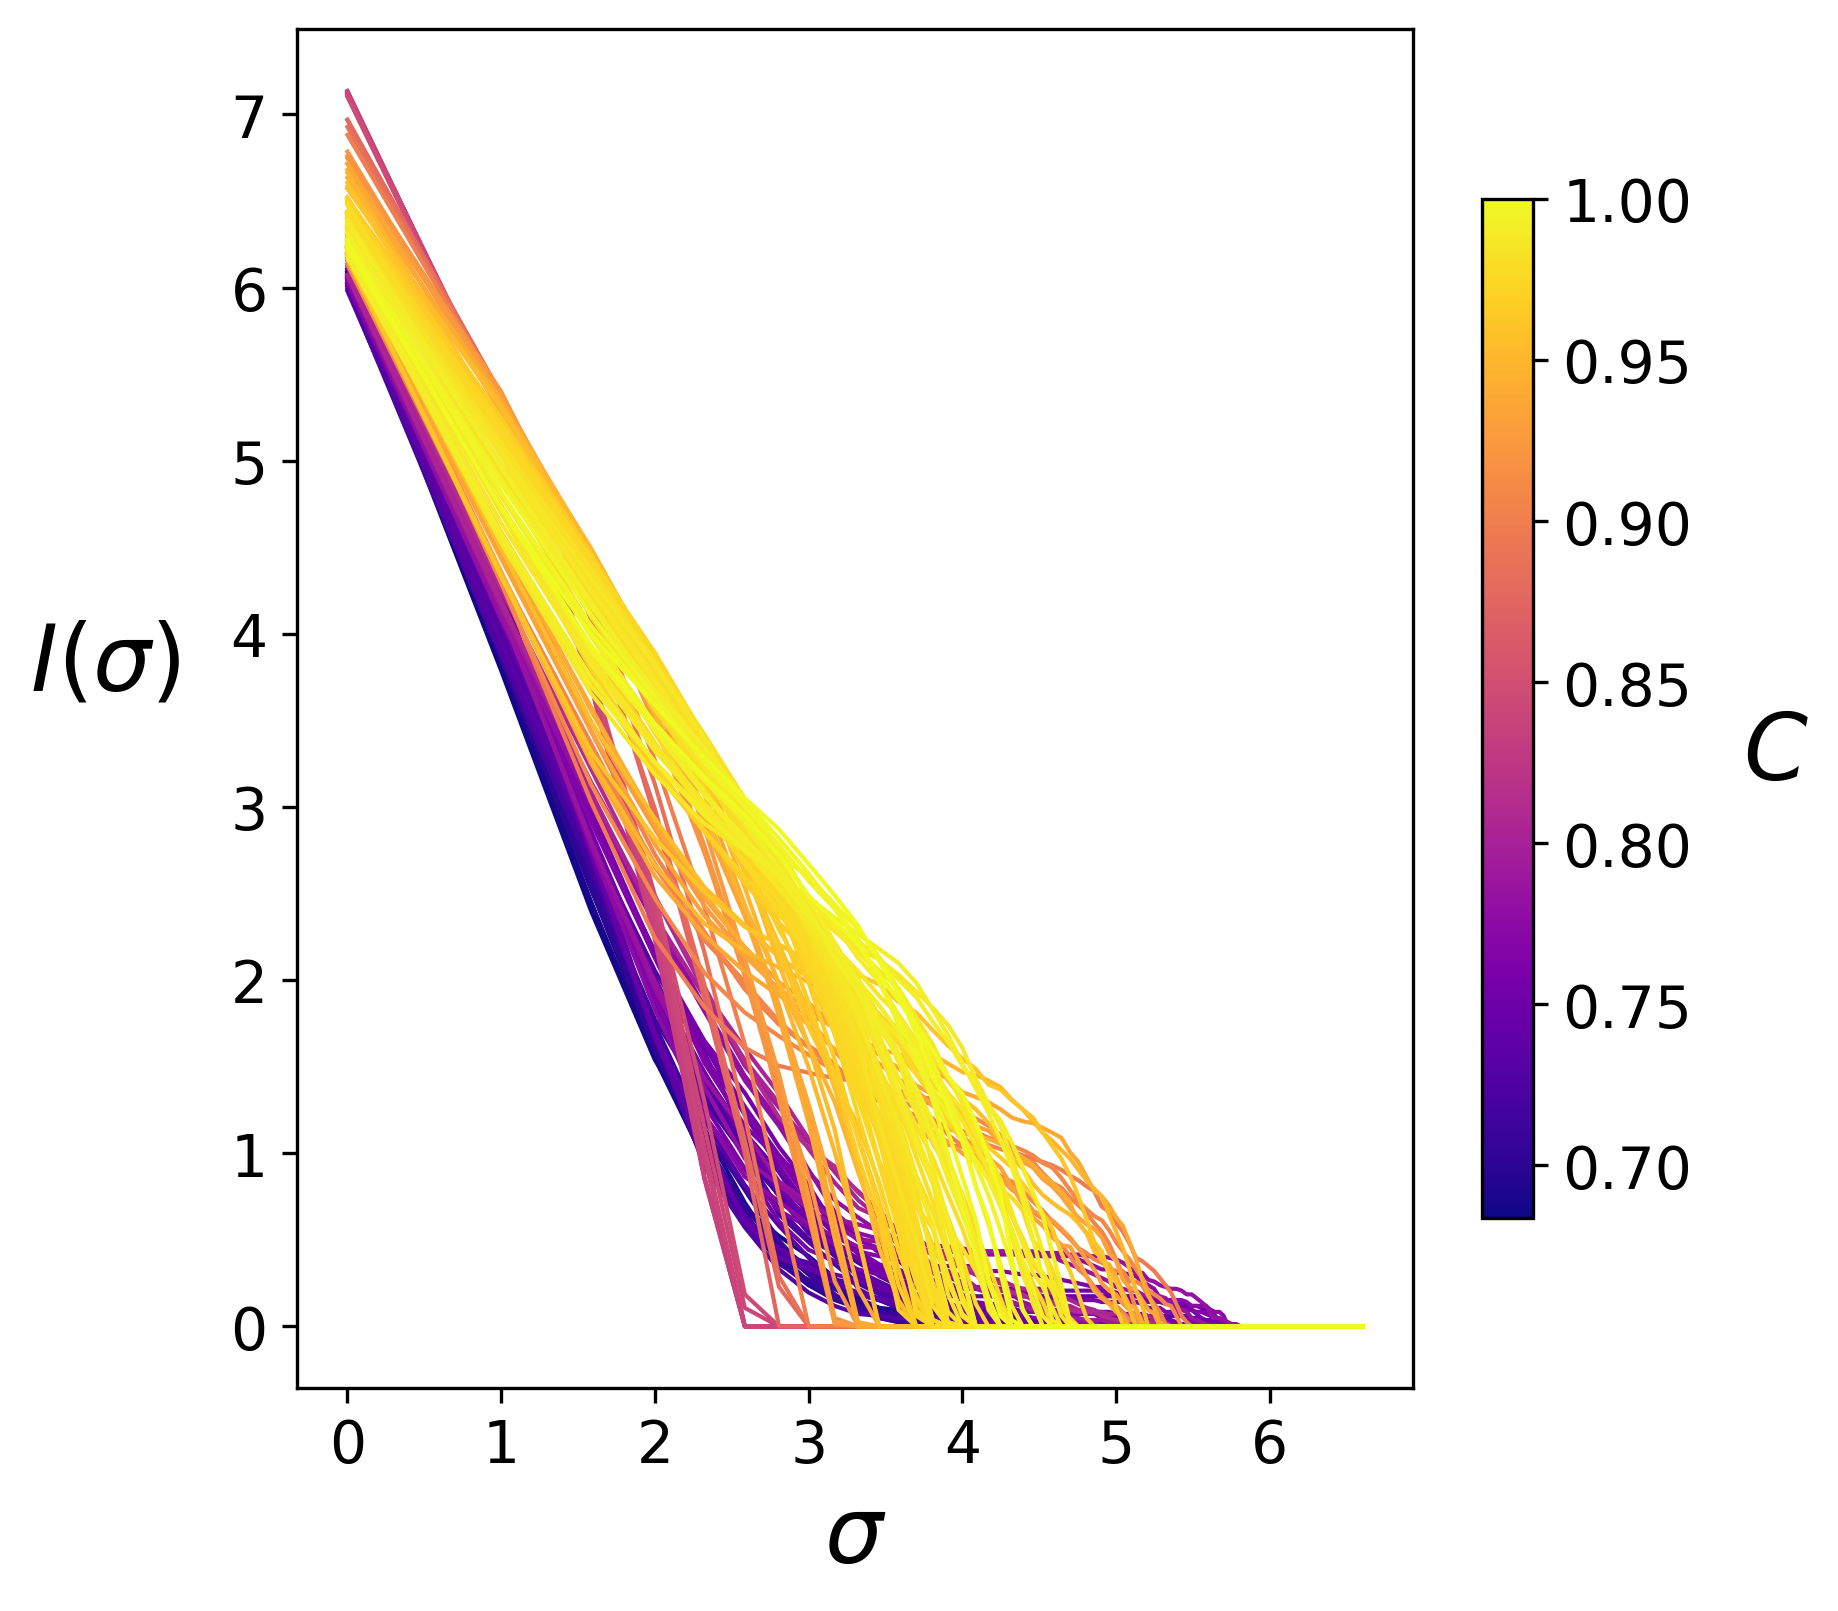

In [4]:
A = AD.copy()
B = AD.copy()
M = max(A["cps"])
A["cps"] = A["cps"].apply(lambda x:(x/M))
# B["cps"] = B["cps"].apply(lambda x:(x/M))
A["sum"] = A["profile_avgProfile"].apply(lambda x:sum(x))
A = A.sort_values("cps")
display(A)
A.to_csv("complexity_profile.csv")

fig, ax = plt.subplots(figsize=(4,4))
color = plt.cm.plasma
norm = plt.Normalize(vmin=min(A["cps"]), vmax=max(A["cps"]))
for I, i in enumerate(A.iterrows()):
    if I % 4 == 0:
        continue
    L = i[-1]
    start = 1
    end = 98
    plt.plot(np.log2(range(start, end)), 
             [np.log2(x) if x>1 else 0 for x in L[-3][start-1:end-1]], 
             linewidth=1, 
             color=color(norm(L[-2]))
            )
    
plt.gcf().set_size_inches(6,6)
fig.set_dpi(300)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlabel(r"$\sigma$", fontsize=22)
ax.set_ylabel(r"$I(\sigma)$", fontsize=22, rotation=0, labelpad=30)
sm = plt.cm.ScalarMappable(cmap=color, norm=norm)
cbar = plt.gcf().colorbar(sm, shrink=0.75, ax=ax)
cbar.set_label(r"$C$", fontsize=22, rotation=0, labelpad=20)
cbar.ax.tick_params(labelsize=14) 

,s,d,profile_avgProfile,cps,sum,s/d
60,0.225,0.5,"[77.86324786324786, 23.085470085470085, 11.247...",0.926653,199.940171,0.450000
77,0.300,0.5,"[86.78632478632478, 30.700854700854695, 17.128...",0.978303,200.000000,0.600000
96,0.375,1.5,"[77.85470085470087, 28.025641025641026, 16.008...",0.991417,200.000000,0.250000
114,0.450,2.0,"[79.3931623931624, 31.170940170940167, 17.9658...",0.991821,200.000000,0.225000
131,0.525,2.0,"[80.81196581196582, 33.128205128205124, 19.982...",0.985753,200.000000,0.262500
150,0.600,3.0,"[83.79487179487178, 33.52991452991453, 19.7777...",0.983413,200.000000,0.200000
169,0.675,4.0,"[83.09401709401709, 34.26495726495727, 20.6923...",0.981508,200.000000,0.168750
185,0.750,3.5,"[86.4957264957265, 35.82051282051282, 20.67521...",0.975497,200.000000,0.214286
51,0.225,0.5,"[70.17948717948718, 20.264957264957264, 10.316...",0.906345,198.675214,0.450000
68,0.300,0.5,"[85.94017094017093, 29.974358974358974, 16.444...",0.975504,200.000000,0.600000


R2 = 0.9066027775521805
[ 7.26190476 -1.32142857]
y=7.261905x+(-1.321429)


Text(0, 0.5, '$|d|$')

<Figure size 432x288 with 0 Axes>

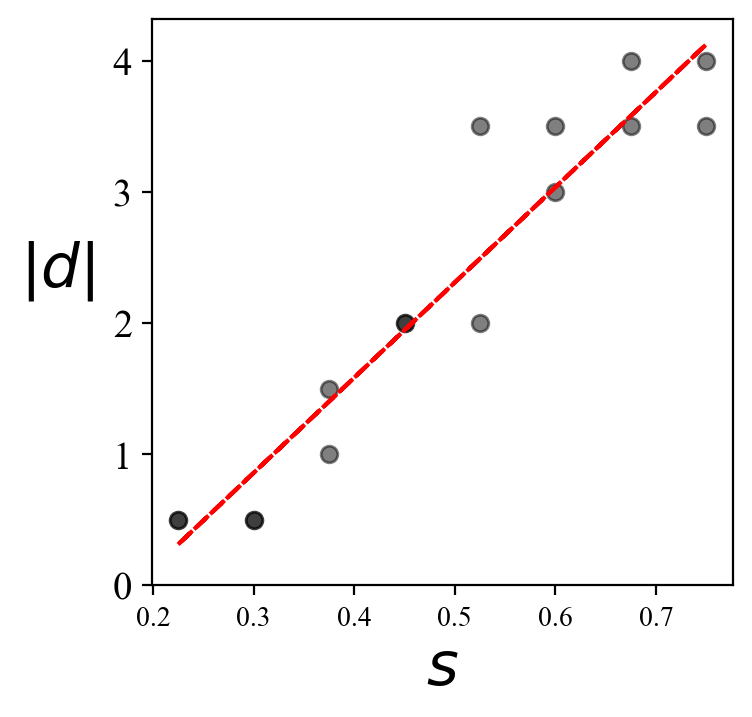

In [10]:
import numpy as np
from sklearn.metrics import r2_score
idxp = A.loc[A["d"] >= 0].groupby("s")["cps"].idxmax()
idxn = A.loc[A["d"] < 0].groupby("s")["cps"].idxmax()

R = pd.concat( [A.loc[idxp], A.loc[idxn]] )
R["d"] = R["d"].apply(np.abs)
R = R.loc[ (R["s"] >= 0.225) ]
R["s/d"] = R["s"] / R["d"]
display(R)

# calc the trendline
z = np.polyfit(list(R["s"]), list(R["d"]), 1)
p = np.poly1d(z)

yTrue = list(R["d"])
yPred = list(map(lambda x: x*z[0] + z[1], list(R["s"])))
R2 = r2_score(yTrue, yPred)
print(f"R2 = {R2}")
# the line equation:
print(z)
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

plt.clf()
fig, ax = plt.subplots()
plt.scatter(R["s"], R["d"], alpha=0.5, color="black")
plt.plot(list(R["s"]), [p(i) for i in list(R["s"])], "r--")

plt.gcf().set_size_inches(3.75,3.75)
fig.set_dpi(200)
plt.yticks([0, 1, 2, 3, 4], fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlabel(r"$s$", fontsize=22)
ax.set_ylabel(r"$|d|$", fontsize=22, rotation=0, labelpad=20)

In [6]:
pv = A.pivot(index="d", columns="s", values="cps")
pv

s,0.010,0.080,0.150,0.225,0.300,0.375,0.450,0.525,0.600,0.675,0.750
d,,,,,,,,,,,
-4.00,0.742829,0.728462,0.704679,0.728308,0.889296,0.961077,0.986488,0.998968,0.996105,0.987689,0.985087
-3.50,0.757632,0.724598,0.703017,0.736782,0.896521,0.968611,0.981901,1.000000,0.998863,0.988185,0.979624
-3.00,0.755373,0.705895,0.713175,0.745323,0.908646,0.979022,0.992504,0.993522,0.990671,0.978208,0.976967
-2.50,0.758954,0.726096,0.704821,0.776263,0.938890,0.972714,0.985339,0.997319,0.989389,0.970903,0.959134
-2.00,0.751421,0.728129,0.702446,0.755647,0.938080,0.990918,0.994405,0.985353,0.975094,0.959646,0.937717
-1.50,0.750105,0.725533,0.698633,0.782426,0.950065,0.986756,0.991371,0.979996,0.956648,0.936641,0.920135
-1.00,0.749933,0.734654,0.722088,0.831889,0.954837,0.991258,0.971230,0.946584,0.924340,0.916774,0.904237
-0.50,0.760545,0.757178,0.764036,0.906345,0.975504,0.948071,0.922012,0.898939,0.885439,0.875142,0.878230
0.01,0.837171,0.846351,0.842100,0.838347,0.838289,0.837468,0.838833,0.834939,0.839651,0.834239,0.833255


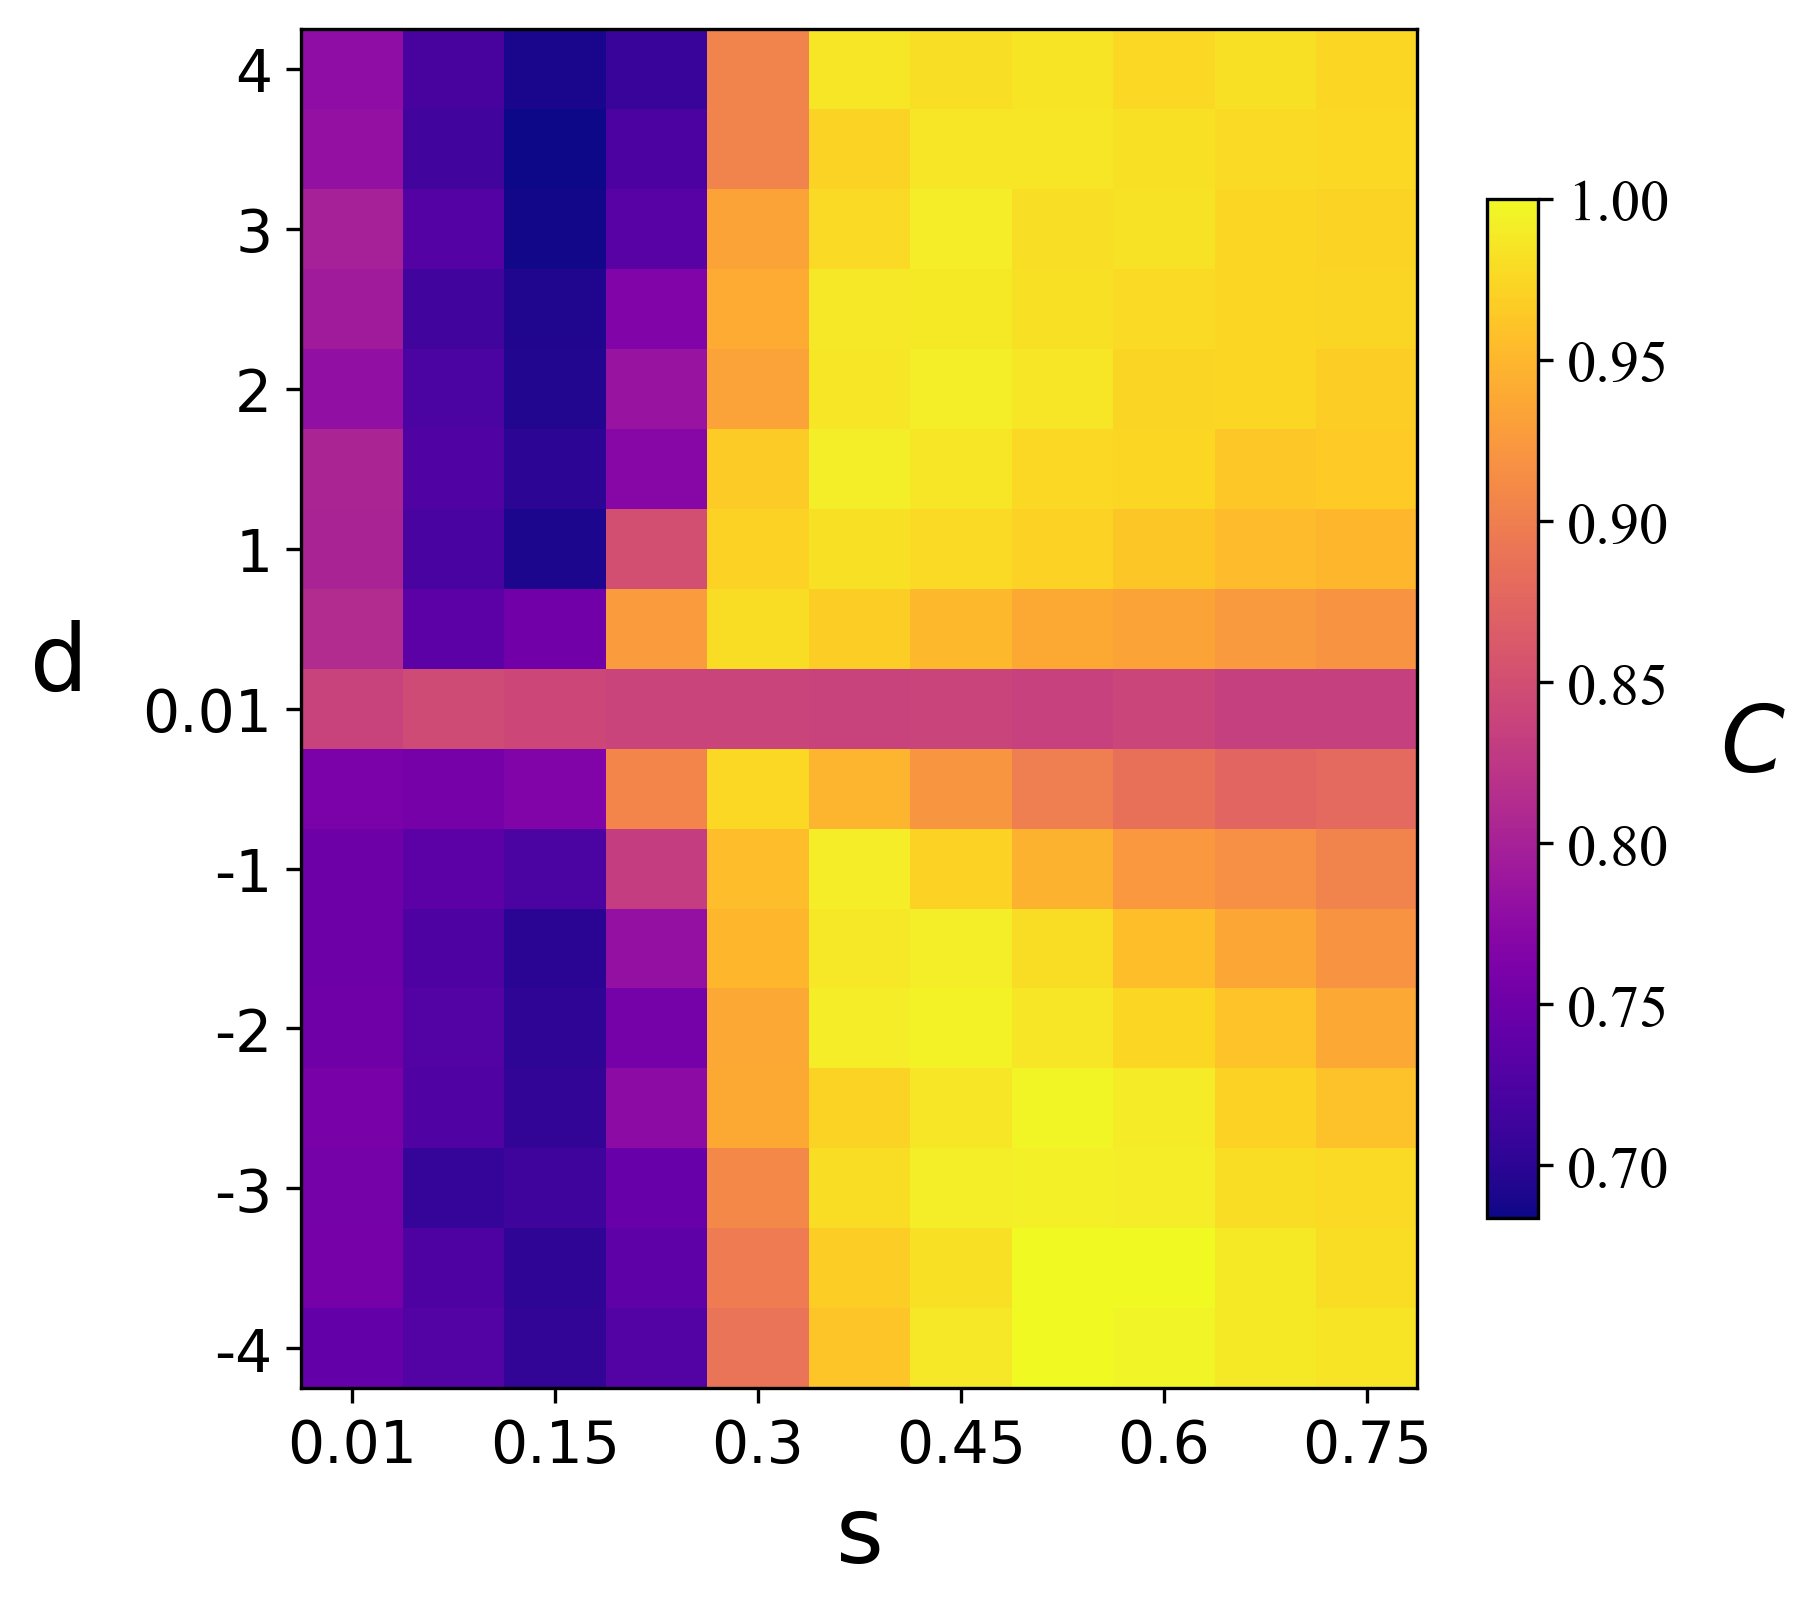

In [7]:
fig, ax = plt.subplots(figsize=(6,6))
from matplotlib import colors
plt.rcParams["font.family"] = "Times New Roman"

ss = list(map(str, [0.01, .08, 0.15, .23, 0.3, .38, 0.45, .53, 0.6, .68, .75]))
ds = list(map(str, [-4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0.01, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]))

pos = plt.pcolormesh(ss, ds, pv, cmap=plt.cm.plasma, shading="auto")
ax.set_xlabel("s", fontsize=22)
plt.xticks([e for i, e in enumerate(ss) if i%2==0], fontsize=14)
ax.set_ylabel("d", fontsize=22, rotation="horizontal", labelpad=20)
plt.yticks([e for i, e in enumerate(ds) if i%2==0], fontsize=14)
fig.set_dpi(300)
cbar = fig.colorbar(pos, shrink=0.75)
cbar.set_label(r"$C$", fontsize=22, rotation=0, labelpad=20)
cbar.ax.tick_params(labelsize=14) 

In [8]:
data = A.copy()
# data["s"] = data["s"] / 0.8
# data["d"] = data["d"] / 4
data["s/d2"] = data["s"] / data["d"]

meanPos = data[data["d"]>0].nlargest(10, "cps")["s/d2"].mean()
meanNeg = data[data["d"]<0].nlargest(10, "cps")["s/d2"].mean()
# plt.hist(data[data["d"]<0]["cps"], bins=40)
meanPos, meanNeg

(0.194875, -0.20376785714285717)

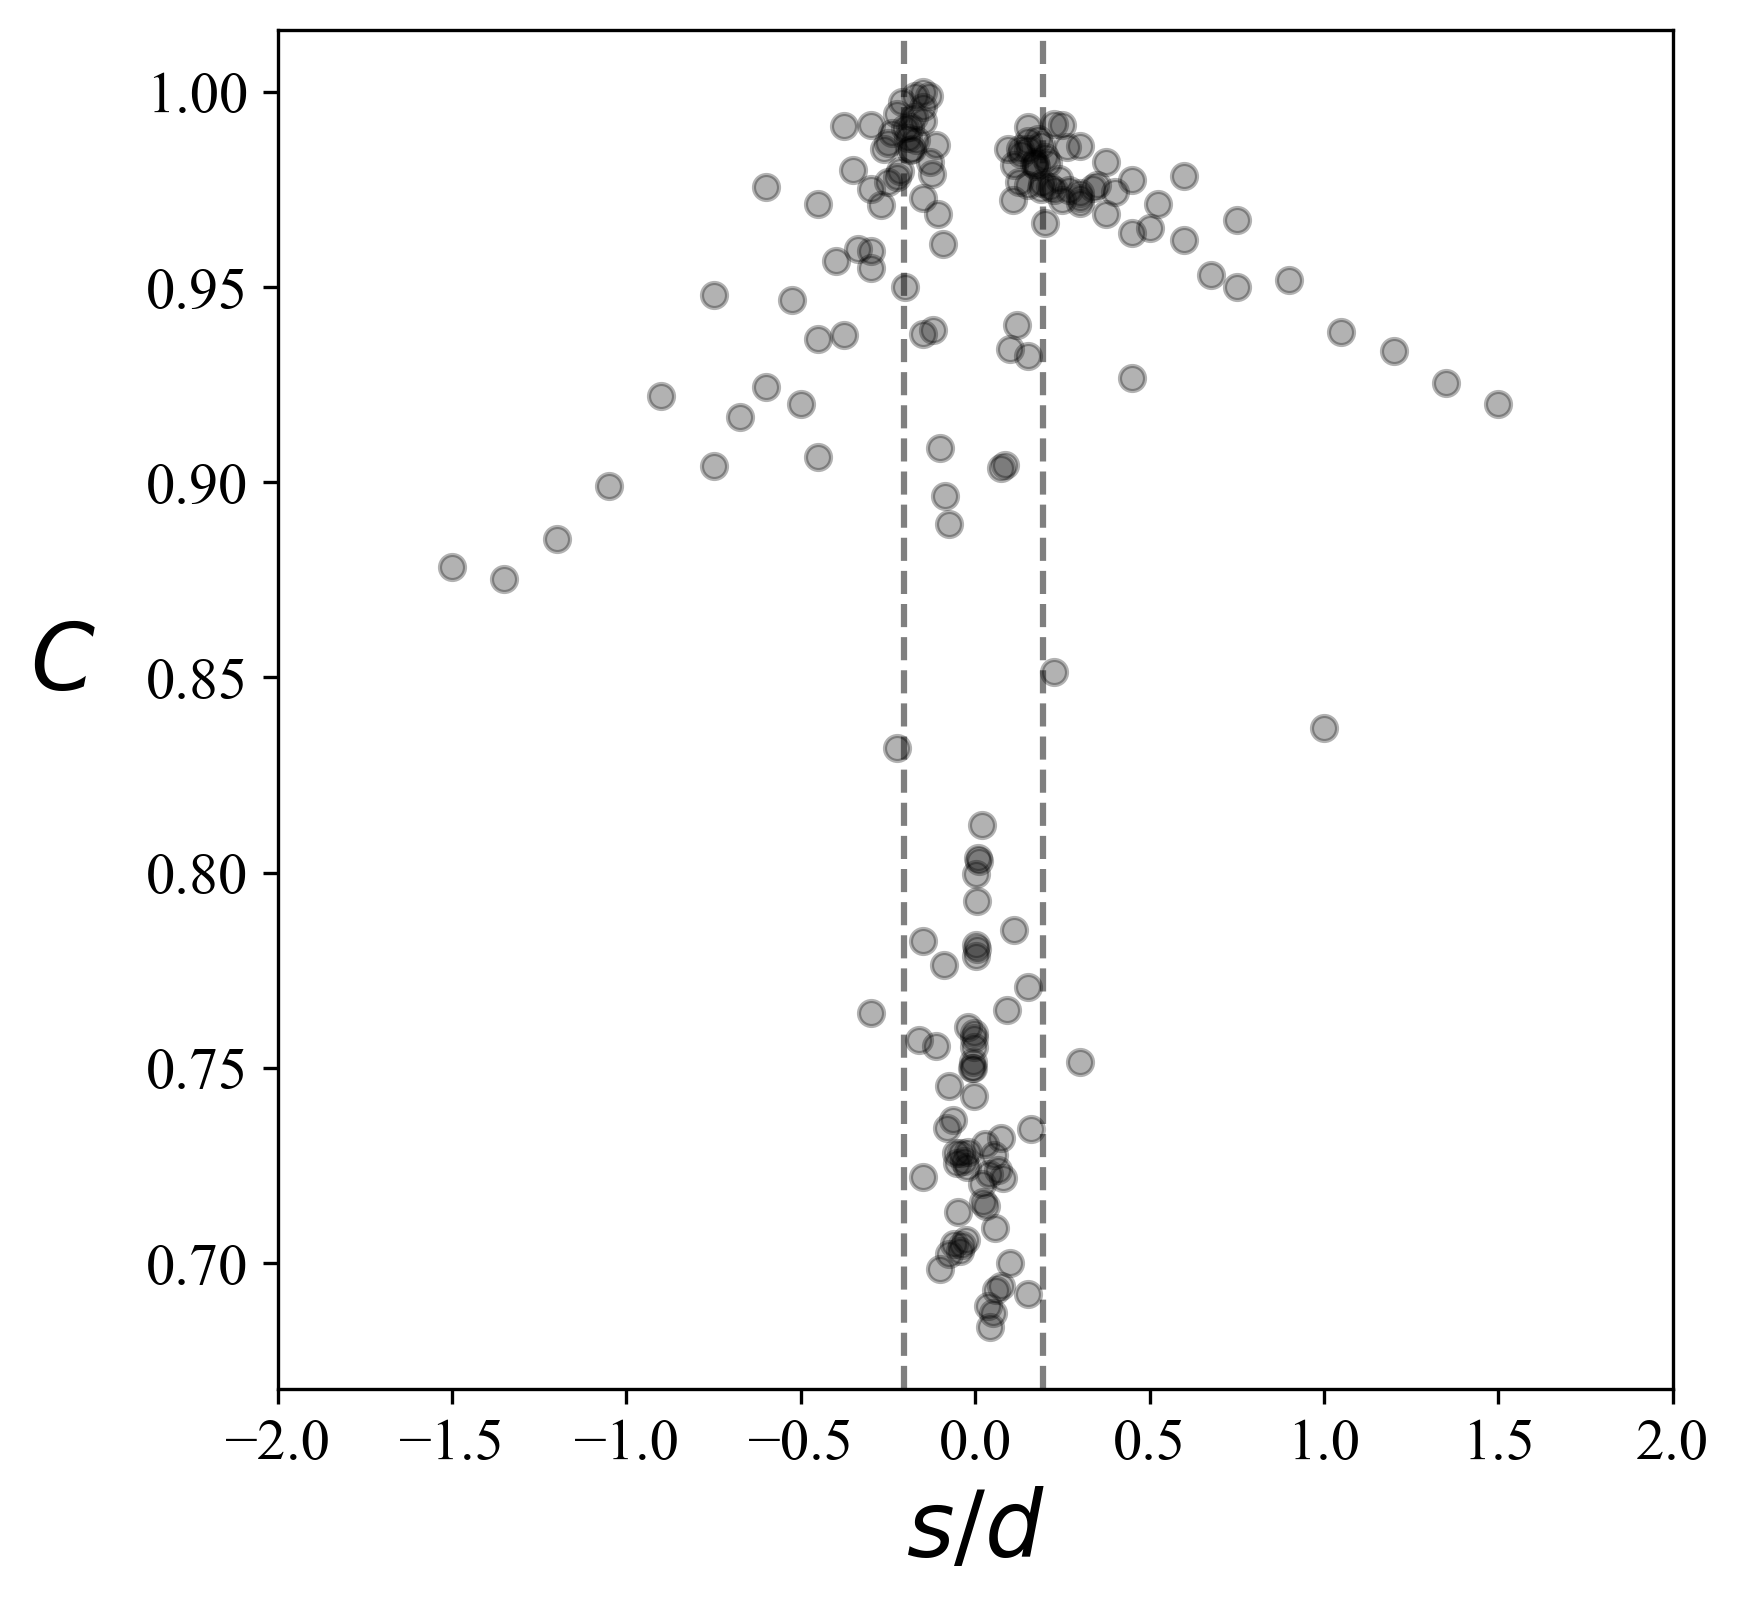

In [9]:
# plot complexity as function of ratio of s and d

fig, ax = plt.subplots(1,1, figsize=(6,6))
fig.set_dpi(300)
pos = ax.scatter(data["s/d2"], data["cps"], alpha=0.3, color="black")
plt.xlim([-2,2])
plt.xlabel(r"$s/d$", fontsize=22, labelpad=5)
plt.ylabel(r"$C$", fontsize=22, rotation=0, labelpad=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(meanPos, linestyle="--", color="black", alpha=0.5)
plt.axvline(meanNeg, linestyle="--", color="black", alpha=0.5)